## Toss input features

In [ ]:
labels

# Find indices where labels change (transitions)

Transition indices: [ 13  37  78 112 184 216 247 269 283 295]


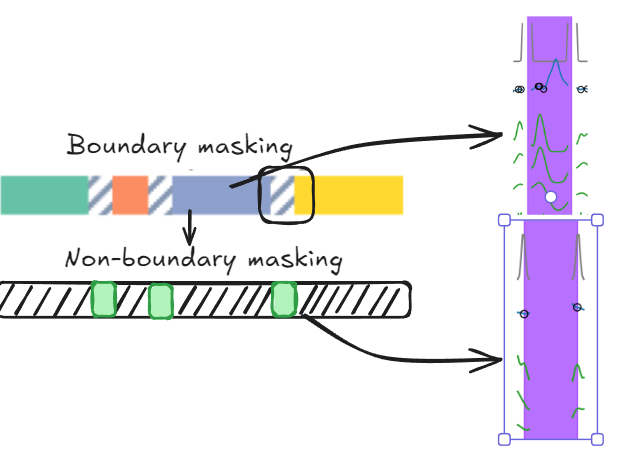


maybe put this on the right side of the feature engineering post

In [ ]:
from ethograph.utils.labels import load_mapping

motif_mappings = load_motif_mapping(r"D:\Akseli\Code\MovFormer\configs_global\mapping.txt")

top_features = [482, 763, 332, 781, 114, 93, 686, 379, 115, 199, 480, 335, 265, 829, 331, 260, 635, 213,
                504, 924, 182, 363, 104, 279, 485]


for feat in [837, 327, 192, 332, 763, 589, 482, 213, 650, 199,  24, 645, 568,
        21, 733, 608, 781,  93, 504, 458, 460,  97, 886, 330, 629, 218,
       248, 671, 480, 829, 784, 265, 585, 731, 114, 115, 644, 780, 707,
       139, 260, 210,  96, 363, 749, 242, 765, 640,   4, 326]:

    
    for trial in dt.trials[:20]:
        ds = dt.sel(trials=trial)
        labels = ds.labels.values.squeeze()
        if np.all(labels == 0):
            continue
        
        s3d = ds.s3d.values
        time = ds.time.values
        
        feature_data = s3d[:, feat]
        
        plt.figure(figsize=(12, 2))
        plt.plot(time, feature_data, label=f'Feature {feat}')
        plot_motif_segments(plt.gca(), time, labels, motif_mappings, is_main=True)
        plt.title(f'Trial {trial} - Feature {feat}')
        plt.xlabel('Time')
        plt.ylabel('Feature Value')
        plt.legend()
        plt.grid(alpha=0.3)
        plt.show()

    
    

In [24]:
labels

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  0.,  0.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


no_changepoint No Changepoint Features
full All Features


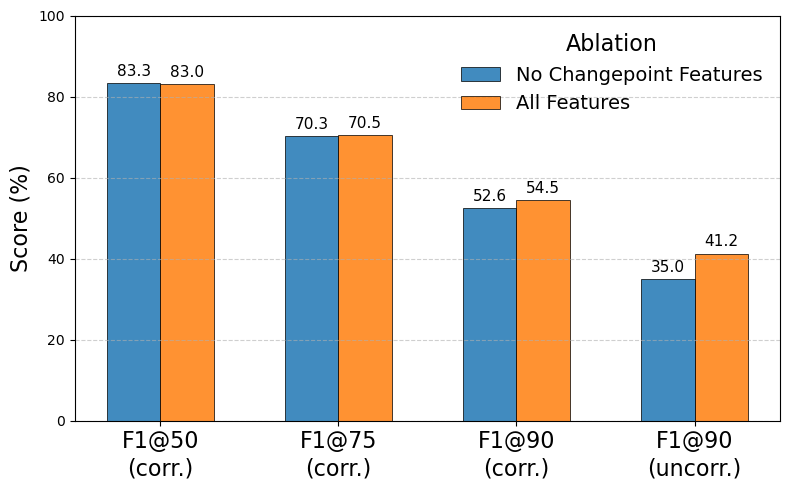

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

key = "uncorrected"
agg_metrics = {}

for split, condition in zip([2, 4], ["no_changepoint", "full"]):
    path = f"C:\\Users\\FM\\Documents\\Akseli\\Code\\MovFormer\\result\\Freddy_feature_ablation_20251021_161907\\split_{split}\\test_results_epoch100.npy"
    data = np.load(path, allow_pickle=True).item()

    agg_metrics[condition] = {
        'F1@50\n(corr.)': float(data["corrected"]['F1@50']),
        'F1@75\n(corr.)': float(data["corrected"]['F1@75']),
        'F1@90\n(corr.)': float(data["corrected"]['F1@90']),    
        'F1@90\n(uncorr.)': float(data["uncorrected"]['F1@90']),
        
    }


df = pd.DataFrame.from_dict(agg_metrics, orient='index')

# Plot setup
fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(len(df.columns))
width = 0.3
colors = plt.cm.tab10.colors  # Nice modern palette


labels = ["No Changepoint Features", "All Features"]


# Plot bars for each condition
for i, condition in enumerate(df.index):
    print(condition, labels[i])
    
    offset = width * (i - len(df.index) / 2 + 0.5)
    bars = ax.bar(
        x + offset,
        df.loc[condition],
        width,
        label=labels[i],
        color=colors[i % len(colors)],
        alpha=0.85,
        edgecolor='black',
        linewidth=0.6
    )

    # Annotate values above bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=11, color='black')

# Style tweaks
ax.set_ylabel('Score (%)', fontsize=16)
ax.set_xticks(x)
ax.set_ylim(0, 100)
ax.set_xticklabels(df.columns, fontsize=16)
ax.legend(title='Ablation', fontsize=14, title_fontsize=16, loc='upper right', frameon=False)
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig("cp/feature_ablation_cp.eps")

In [12]:
cp_feats.shape

(250, 9)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0.5, 2, 7]
(250, 4) (250, 4) (250,)


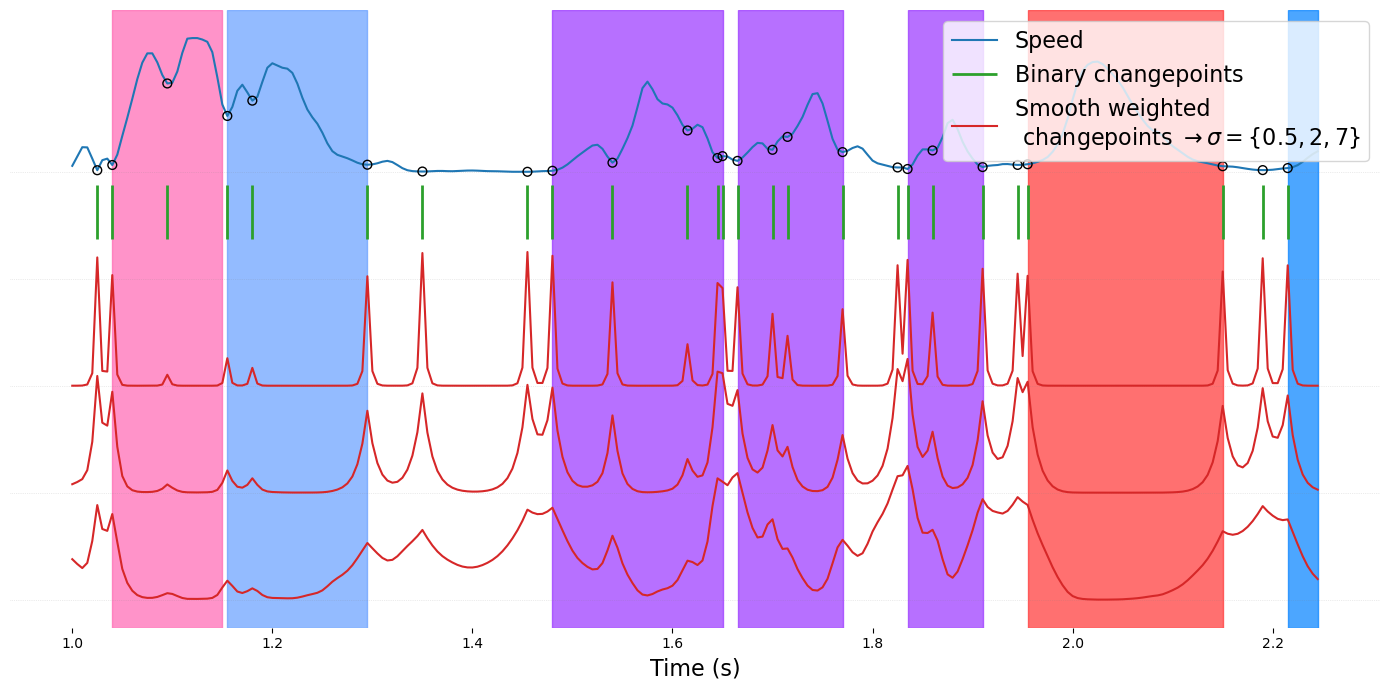

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from ethograph.utils.io import TrialTree
from ethograph.utils.labels import plot_motif_segments, load_motif_mapping
from ethograph.features.changepoints import more_changepoint_features, merge_changepoints


path = r"C:\Users\Admin\Documents\Akseli\AI_data\derivatives\sub-03_id-Freddy\ses-000_date-20250527_01\behav\Trial_data.nc"
dt = TrialTree.load(path)

num = 49
ds = dt.sel(trials=num).isel(time=slice(200, 450))
motif_mappings = load_motif_mapping(r"C:\Users\Admin\Documents\Akseli\Code\MovFormer\configs_global\mapping.txt")

kwargs = {"keypoints": "beakTip", "individuals": "Freddy"}
labels = ds.labels.sel(individuals="Freddy").values
time = ds.time.values

speed = ds.speed.sel(**kwargs)
acc = ds.acceleration.sel(**kwargs)
s3d = ds.s3d

cp_ds, _ = merge_changepoints(ds.sel(**kwargs))

cp_binary = cp_ds["changepoints"].squeeze().values
cp_idxs = np.where(cp_binary)[0]

cp_feats = more_changepoint_features(
    cp_binary,
    targ_feat_vals=speed.values,
    sigmas=[0.5, 2, 7] # these values might be better, but would have train new model with these
)
# 
# Group colors by feature type
feature_colors = {
    "speed": "#1f77b4",           # blue
    "changepoint_binary": "#2ca02c",    # green
    "changepoint_wgaussian": "#d62728",  # brown
}

shift_factor = -0.8
event_seq_raw = np.where(labels == 0, -100, labels)


datasets = [
    ("Speed", speed, "speed"),
    ("Binary changepoints", cp_feats[:, 0], "changepoint_binary"),
    ("Smooth weighted \n changepoints $\\rightarrow \\sigma=\\{0.5, 2, 7\\}$", cp_feats[:, 5], "changepoint_wgaussian"),
    ("", cp_feats[:, 6], "changepoint_wgaussian"),
    ("", cp_feats[:, 7], "changepoint_wgaussian")
]




fig, ax = plt.subplots(figsize=(14, 7))

for idx, (label, data, group) in enumerate(datasets):
    if isinstance(data, np.ndarray):
        values = data
    else:
        values = data.values

    normalized = (values - np.nanmin(values)) / (np.nanmax(values) - np.nanmin(values) + 1e-8)
    shifted = normalized + idx * shift_factor

    if label == "Binary changepoints":
        pulse_indices = np.where(values > 0.5)[0]
        ax.vlines(time[pulse_indices], shifted.min()+0.3, shifted.max()-0.3,
                color=feature_colors[group], label=label, linewidth=2, zorder=3)
    else:
        ax.plot(time, shifted, color=feature_colors[group], label=label, zorder=2)
        if 'Speed' == label:
            ax.scatter(time[cp_idxs], shifted[cp_idxs], s=40, marker='o',
                    edgecolor='black', facecolor='none', zorder=4)

    ax.axhline(y=shifted.min(), color='gray', linestyle=':', alpha=0.3, linewidth=0.5, zorder=1)


ylim = ax.get_ylim()
plot_motif_segments(ax, time, labels, motif_mappings, is_main=True)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_xlabel('Time (s)', fontsize=16)
ax.set_yticks([])
plt.legend(fontsize=16, )

plt.tight_layout()
plt.savefig("cp/cp_feats.eps")